<center><h1><b> Deep Learning Handwritten Digits
    </b1><h1/></center>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
(X_train, y_train), (X_test, y_test)  = keras.datasets.mnist.load_data()

In [5]:
len(X_train)

60000

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
len(X_test)

10000

In [8]:
X_test.shape

(10000, 28, 28)

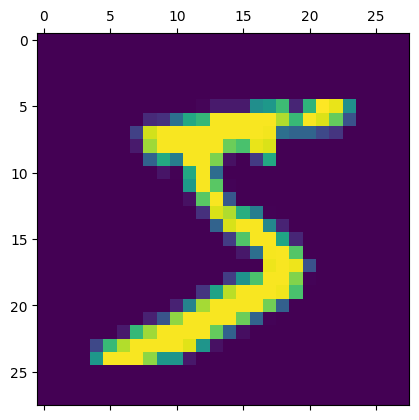

In [9]:
plt.matshow(X_train[0]);

In [10]:
# Scaling the data with the highest possible value in the data
X_train = X_train/255
X_test = X_test/255

### X_train Flattening i.e changing from 2 dimesion to 1 dimesion

In [11]:
X_train_flat = X_train.reshape(len(X_train), 28*28)  # 28 * 28 is the 2d dimension of the image

In [12]:
X_train_flat.shape

(60000, 784)

In [13]:
X_test_flat = X_test.reshape(len(X_test), 28 * 28)
X_test_flat.shape

(10000, 784)

In [14]:
X_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
# Neural Network definning
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])  # Sequential means layers will be stacked. Dense means all layers in the input (784) are connected with all layers in output(10)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# This will compile the neural network
model.compile(optimizer='adam',  # It allows efficient training
              loss='sparse_categorical_crossentropy', # This is used because the output is categorical. there are other options that can be used
              metrics=['accuracy']
             )

In [17]:
# Buildig the model
model.fit(X_train_flat, y_train, epochs=5) # epochs mean number of iteration the neural network will run the training

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8171 - loss: 0.7248
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9146 - loss: 0.3093
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9217 - loss: 0.2807
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9241 - loss: 0.2704
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9266 - loss: 0.2636


In [18]:
# Evaluatig the accuracy of the model on test dataset
model.evaluate(X_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9165 - loss: 0.3005


[0.26515433192253113, 0.926800012588501]

#### Sample prediction

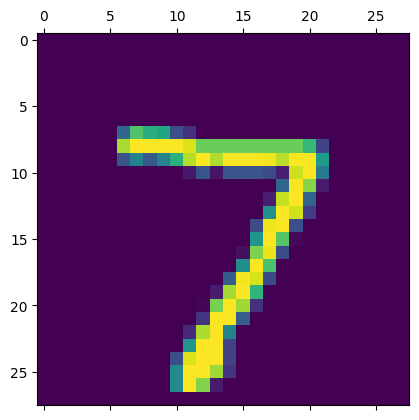

In [19]:
plt.matshow(X_test[0]);

In [20]:
pred=model.predict(X_test_flat)
pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([1.44321695e-02, 3.54827080e-07, 5.59613667e-02, 9.54166353e-01,
       2.68009328e-03, 9.41984653e-02, 1.16852948e-06, 9.99825537e-01,
       8.99063423e-02, 7.07531989e-01], dtype=float32)

In [21]:
# numpy argmax will be used to print the index of the maximum value
np.argmax(pred[0])

7

## Plotting Confusion Matrix

In [22]:
y_pred_labels = [np.argmax(i) for i in pred]
y_pred_labels[:4]

[7, 2, 1, 0]

In [23]:
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [24]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    1,    2,    0,    6,    8,    3,    2,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   4,    9,  919,   21,    8,    5,   14,   10,   38,    4],
       [   2,    0,   14,  928,    1,   24,    2,    9,   19,   11],
       [   1,    1,    2,    2,  912,    0,   12,    4,    7,   41],
       [   7,    2,    2,   33,    8,  781,   16,    7,   28,    8],
       [   7,    3,    5,    1,    7,   15,  917,    2,    1,    0],
       [   1,    6,   21,    7,    7,    0,    0,  946,    2,   38],
       [   4,   10,    6,   27,    9,   30,    9,   10,  857,   12],
       [  10,    6,    1,   10,   21,    5,    0,   16,    5,  935]],
      dtype=int32)>

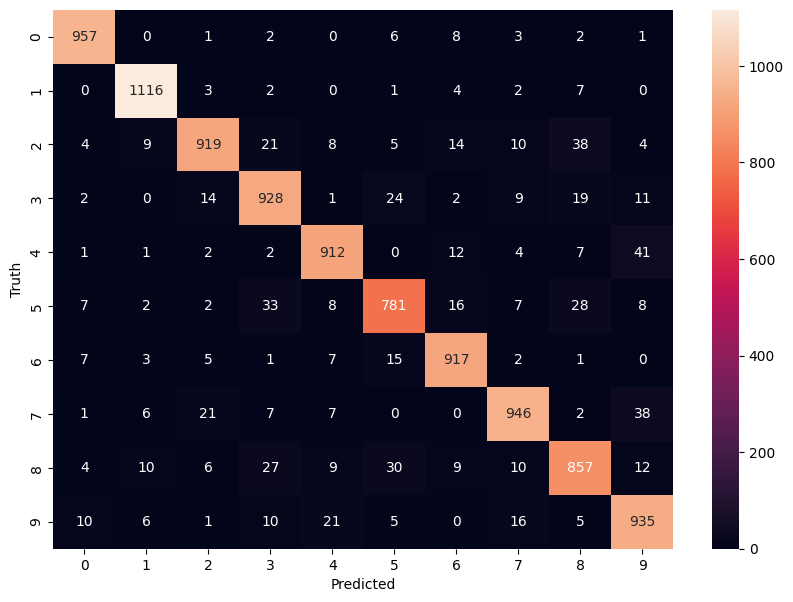

In [25]:
# Visualizig the confusion matrix
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth');

## Model Improvement with Hidden Layer

In [26]:
# Neural Network definning
model1 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),  # 100 neurons is to be used
    keras.layers.Dense(10, activation='sigmoid')
])  # Sequential means layers will be stacked. Dense means all layers in the input (784) are connected with all layers in output(10)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# This will compile the neural network
model1.compile(optimizer='adam',  # It allows efficient training
              loss='sparse_categorical_crossentropy', # This is used because the output is categorical. there are other options that can be used
              metrics=['accuracy']
             )

In [28]:
# Buildig the model
model1.fit(X_train_flat, y_train, epochs=5) # epochs mean number of iteration the neural network will run the training

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8691 - loss: 0.4605
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9618 - loss: 0.1307
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9746 - loss: 0.0873
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9799 - loss: 0.0666
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9845 - loss: 0.0507


In [29]:
model1.evaluate(X_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9699 - loss: 0.0971


[0.08227293938398361, 0.9747999906539917]

In [30]:
## Making prediction
y_pred=model1.predict(X_test_flat)
pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([1.44321695e-02, 3.54827080e-07, 5.59613667e-02, 9.54166353e-01,
       2.68009328e-03, 9.41984653e-02, 1.16852948e-06, 9.99825537e-01,
       8.99063423e-02, 7.07531989e-01], dtype=float32)

In [31]:
y_pred_labels1 = [np.argmax(i) for i in y_pred]
y_pred_labels1[:4]

[7, 2, 1, 0]

In [32]:
# Cofusion matrix
cm1 = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels1)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    0,    2,    2,    0,    3,    1,    2,    2],
       [   0, 1127,    2,    1,    0,    1,    1,    0,    3,    0],
       [   4,    1, 1007,    1,    2,    0,    3,    3,   11,    0],
       [   0,    0,    5,  986,    0,    5,    0,    1,   12,    1],
       [   0,    1,    3,    0,  966,    0,    5,    1,    2,    4],
       [   2,    0,    0,   10,    1,  869,    4,    0,    5,    1],
       [   4,    3,    0,    1,    4,    6,  937,    0,    3,    0],
       [   2,   13,   11,    7,    3,    0,    0,  973,    6,   13],
       [   4,    2,    3,    4,    4,    3,    1,    1,  951,    1],
       [   1,    6,    0,    7,   16,    3,    1,    3,    8,  964]],
      dtype=int32)>

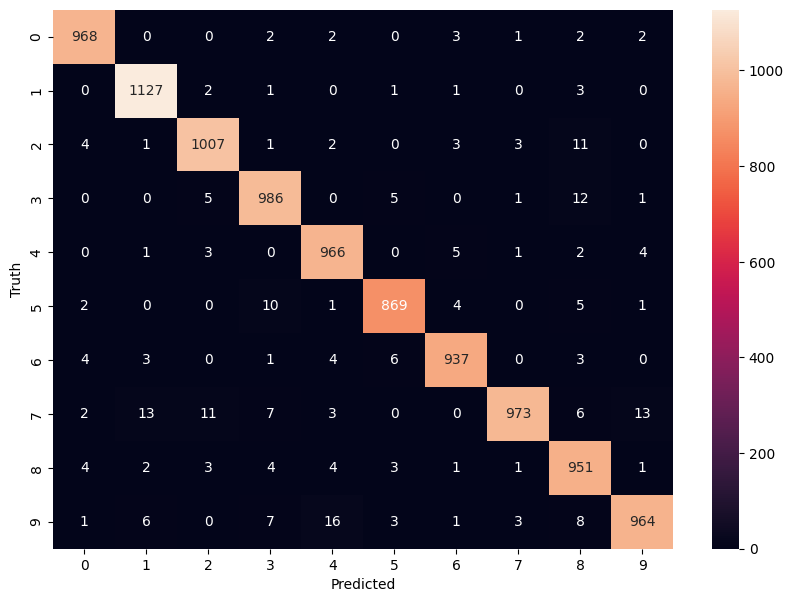

In [33]:
# Visualizig the confusion matrix
plt.figure(figsize=(10,7))
sb.heatmap(cm1, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth');

## Using Keras Flatten argument

In [34]:
# Neural Network definning
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),  # 100 neurons is to be used
    keras.layers.Dense(10, activation='sigmoid')
])  # Sequential means layers will be stacked. Dense means all layers in the input (784) are connected with all layers in output(10)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
# This will compile the neural network
model2.compile(optimizer='adam',  # It allows efficient training
              loss='sparse_categorical_crossentropy', # This is used because the output is categorical. there are other options that can be used
              metrics=['accuracy']
             )

In [36]:
# Buildig the model
model2.fit(X_train, y_train, epochs=10) # epochs mean number of iteration the neural network will run the training

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8642 - loss: 0.4692
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9590 - loss: 0.1374
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9719 - loss: 0.0923
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9804 - loss: 0.0662
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9845 - loss: 0.0518
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9868 - loss: 0.0445
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9897 - loss: 0.0343
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9919 - loss: 0.0297
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9936 - loss: 0.0223
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9942 - loss: 0.0198


## Experimenting other Loss Functions

In [37]:
# Neural Network definition
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Softmax for multi-class classification
])

# Compile the model using sparse_categorical_crossentropy
model3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
               loss='sparse_categorical_crossentropy',  # Suitable for integer labels
               metrics=['accuracy'])

# Training the model
model3.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8715 - loss: 0.4509
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9623 - loss: 0.1318
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9744 - loss: 0.0843
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9816 - loss: 0.0632
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9843 - loss: 0.0504
